# Titanic Disaster Study

By Thibault Dody

<img src="./Misc/Titanic1.jpg",width=642,height=288>

## Table of Content   

**1. Introduction**   
**2. Data Import**  
&nbsp;&nbsp;&nbsp;&nbsp;2.1 Import Libraries  
&nbsp;&nbsp;&nbsp;&nbsp;2.2 Load specific tools  
&nbsp;&nbsp;&nbsp;&nbsp;2.3 Data Import  
**3. Data Exploration and Data Cleaning**  
&nbsp;&nbsp;&nbsp;&nbsp;3.1 Embarked Feature  
&nbsp;&nbsp;&nbsp;&nbsp;3.2 Fare Feature  
&nbsp;&nbsp;&nbsp;&nbsp;3.3 Cabin Feature  
&nbsp;&nbsp;&nbsp;&nbsp;3.4 Age Feature  
**4. Data Visualization and Feature Exploration**  
&nbsp;&nbsp;&nbsp;&nbsp;4.1 Gender  
&nbsp;&nbsp;&nbsp;&nbsp;4.2 Age  
&nbsp;&nbsp;&nbsp;&nbsp;4.3 Pclass and Fare  
&nbsp;&nbsp;&nbsp;&nbsp;4.4 SibSp & Parch  
**5. Statistical Study**  
&nbsp;&nbsp;&nbsp;&nbsp;5.1 Correlation Study  
**6. Feature Engineering**  
&nbsp;&nbsp;&nbsp;&nbsp;6.1 family_count and family_group  
&nbsp;&nbsp;&nbsp;&nbsp;6.2 Fare  
&nbsp;&nbsp;&nbsp;&nbsp;6.3 Name  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*6.3.1 Name length*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*6.3.2 Passenger Title*  
&nbsp;&nbsp;&nbsp;&nbsp;6.4 Cabin  
&nbsp;&nbsp;&nbsp;&nbsp;6.5 Create dummy features  
&nbsp;&nbsp;&nbsp;&nbsp;6.6 Age feature  
**7. Model Preparation**  
**8. Models**  
&nbsp;&nbsp;&nbsp;&nbsp;8.1 Logistic Regression  
&nbsp;&nbsp;&nbsp;&nbsp;8.2 KNN  
&nbsp;&nbsp;&nbsp;&nbsp;8.3 SMC  
&nbsp;&nbsp;&nbsp;&nbsp;8.4 Gaussian Naive Bayes  
&nbsp;&nbsp;&nbsp;&nbsp;8.5 Decision Tree Classifier  
&nbsp;&nbsp;&nbsp;&nbsp;8.6 Bagging  
&nbsp;&nbsp;&nbsp;&nbsp;8.7 Random Forest Classifier  
&nbsp;&nbsp;&nbsp;&nbsp;8.8 Gradient Boosting Classifier  
**9. Conclusion**

## 1. Introduction

On April 15, 1912, the Titanic sak after colliding with an iceberg, 1502 out of 2224 passagers and crew members died. The dataset containing passenger information has been made available. The purpose of this Notebook is to perform a comparison study of different models aimed at predicting survival rate.

## 2. Data Import
### 2.1 Import Libraries

In [19]:
# Load libraries
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp
print("scipy version: {}".format(sp.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.22.0
matplotlib version: 2.1.2
numpy version: 1.14.5
scipy version: 1.0.0
sklearn version: 0.19.1


### 2.2 Load specific tools

In [20]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

# Modelling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Do not show warnings (added after Notebook was finalized)
import warnings
warnings.filterwarnings('ignore')

### 2.3 Data Import

In [21]:
# Import training and testing csv datasets
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [22]:
# Inspect data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Inspect data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2.5 Data Inspection

The data is divived into two separate datasets:
- a training set containing a set of features and out target variable (whether or not a passenger survived)
- a test set containing only the set of features

#### Data   
**. Pclass**: Categorical feature used to describe the passenger class (1=Upper, 2=Middle, 3=Lower).   
**. Name**: String Containing a passenger name and title.   
**. Sex**: Categorical variable describing the passenger's gender.   
**. Age**: Numerical feature standing for the passenger's age.   
**. SibSp**: Number of siblings/spouses aboard.   
**. Parch**: Number of parents/children aboard.   
**. Ticket**: Ticket number.   
**. Fare**: Price of the ticket.   
**. Cabin**: Cabin id.   
**. Embarked**: Categorical feature, port of embarkation.   

## 3. Data Exploration and Data Cleaning

In [24]:
# Remoce the Passengerid from the set as it does not need to be included in the models
passengerId = test.PassengerId

train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 32.7+ KB


**COMMENT**   
Several of the features in the **training** set appear to be incomplete (Age, Cabin, and Embarked).   
Several of the features in the **test** set appear to be incomplete (Age, Cabin, and Fare).

In [27]:
missing_total = train.isnull().sum().sort_values(ascending=False)
missing_percentage = missing_total/train.shape[0]*100
print('Missing values in training set:')
pd.concat([missing_total,missing_percentage],keys=['Count','Percentage'],axis=1)

Missing values in training set:


,Count,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


Based on the above table, the following conclusions can be drawn:
1. The cabin feature is mostly empty, this will be hard to use.
2. The age feature contains a large number of missing values. This will requiere a smarter approach rather than just filling the null with a median.
3. The embaked feature only has 2 missing values. We can come up with estimate for these two by taking a quick look at the data and using the most probable value as a replacement.

In [28]:
missing_total = test.isnull().sum().sort_values(ascending=False)
missing_percentage = missing_total/test.shape[0]*100
print('Missing values in test set:')
pd.concat([missing_total,missing_percentage],keys=['Count','Percentage'],axis=1)

Missing values in test set:


,Count,Percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


### 3.1 Embarked Feature   
The embarked feature has missing values in the training set.

In [29]:
# Distribution of the data
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

We now inspect the rest of the records for these two missing values:

In [30]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Two females with a fare of $80 traveling in first calss. We use this information by comparing how the fare is distributed based on the embarked location.

Text(0.5,1,'Test Set')

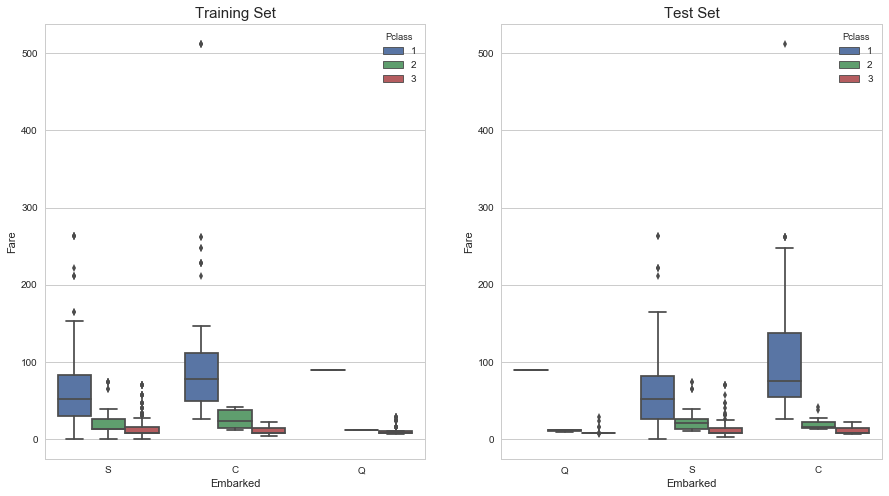

In [31]:
# Plot information
fig, ax = plt.subplots(figsize=(15,8),ncols=2)
ax1 = sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=train,ax=ax[0])
ax2 = sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=test,ax=ax[1])
ax1.set_title('Training Set',fontsize=15)
ax2.set_title('Test Set',fontsize=15)

**COMMENT**   
Based on the boxplot above, the embarked location corresponding to a fare of $80 in first class is defined as "C".

In [32]:
# Fill missing values
train.Embarked.fillna('C',inplace=True)

### 3.2 Fare Feature
The test set has a missing value for the Fare feature.

In [33]:
# Display record corresponding to missing value
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


We will use the median Fare of the subset corresponding to Pclass=3, Embarked='S', Sex='male', Age>=21 (for adult).

In [34]:
# Extract median
subset_med = test[(test.Pclass==3) & (test.Embarked=='S') & (test.Sex=='male') & (test.Age>=21)].Fare.median()

# Replace missing value
test.Fare.fillna(subset_med,inplace=True)

### 3.3 Cabin Feature

The cabin feature is missing for 77% of the training set and 78% of the test set. With such a high percentage, the feature can either be dropped or feature engineering can be used to understand how the cabin id is defined. We opt for the second option.

In [35]:
# Feature inspection
train.Cabin.sort_values().head()

583    A10
475    A14
556    A16
284    A19
599    A20
Name: Cabin, dtype: object

It seems that the cabin is made of a letter followed by two digits. After inspection, it appears that the letter corresponds to the cabin deck.  

In [36]:
# Fill missing values with Z00 (it does not correspond to a real deck)
train.Cabin.fillna('Z00',inplace=True)
test.Cabin.fillna('Z00',inplace=True)

# Extract deck letter
train['Deck'] = train['Cabin'].apply(lambda x: x[0])
test['Deck'] = test['Cabin'].apply(lambda x: x[0])

In [37]:
# Inspect deck distribution based on fare and class
train[['Deck','Fare','Pclass']].groupby(['Pclass','Deck']).median()

Fare
Pclass Deck          
1      A     35.50000
       B     80.00000
       C     83.47500
       D     75.25000
       E     55.00000
       T     35.50000
       Z     44.75000
2      D     13.00000
       E     11.42500
       F     26.00000
       Z     15.02290
3      E     12.47500
       F      7.65000
       G     13.58125
       Z      8.05000

**COMMENT**   
From the above table, we can see that certain decks were used only by a single class:
- Decks A, B, C, and T are used only by the Upper class
- All three classes share deck E
- Deck D is shared between the upper and middle class
- Deck F is shared between the middle and lower class
- Deck G is used by the lower class only

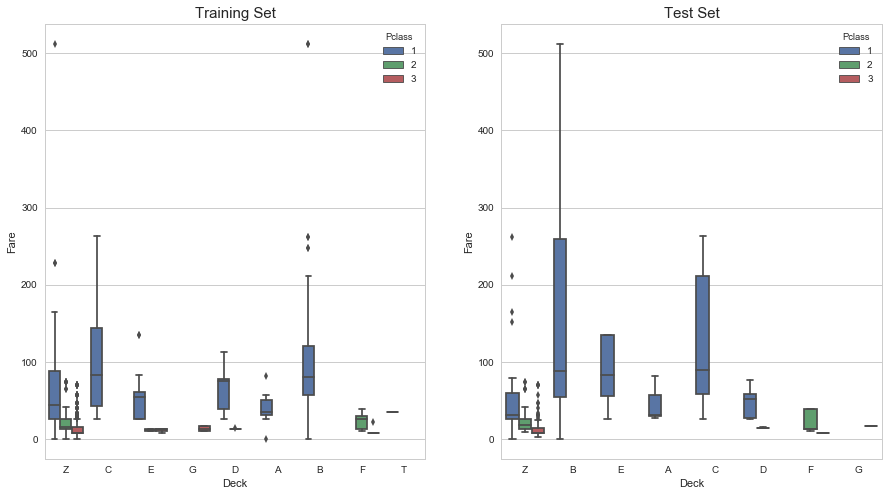

In [38]:
# Plot information
fig, ax = plt.subplots(figsize=(15,8),ncols=2)
ax1 = sns.boxplot(x='Deck',y='Fare',hue='Pclass',data=train,ax=ax[0])
ax2 = sns.boxplot(x='Deck',y='Fare',hue='Pclass',data=test,ax=ax[1])
ax1.set_title('Training Set',fontsize=15)
ax2.set_title('Test Set',fontsize=15);

### 3.4 Age Feature   

Roughly 20% of the Age data is missing is both the training and test sets. Replacing the missing values by a value such as a median would be oversimplified. We will later implement a  K Nearest neighbors(KNN) model to to fill the missing values.

## 4. Data Visualization and Feature Exploration

Before we implement the full model, it is important to inspect the data and answers a few basic questions. This will help understanding how the data is distributed but also will provide usefull feedback before we implement our models.

Based on the famous rule *"Women and children first"*, we expect the gender and age to be strongly correlated with the survival rate.

Questions:

1. Gender: Is the survival rate higher for females?
2. Age: Is the survival rate higher for young passengers?
3. Pclass & Fare: Is the survival rate higher amongst wealthy passengers?
4. SibSp & Parch: Is the survival rate for family is higher than the one for single passenger?

### 4.1 Gender

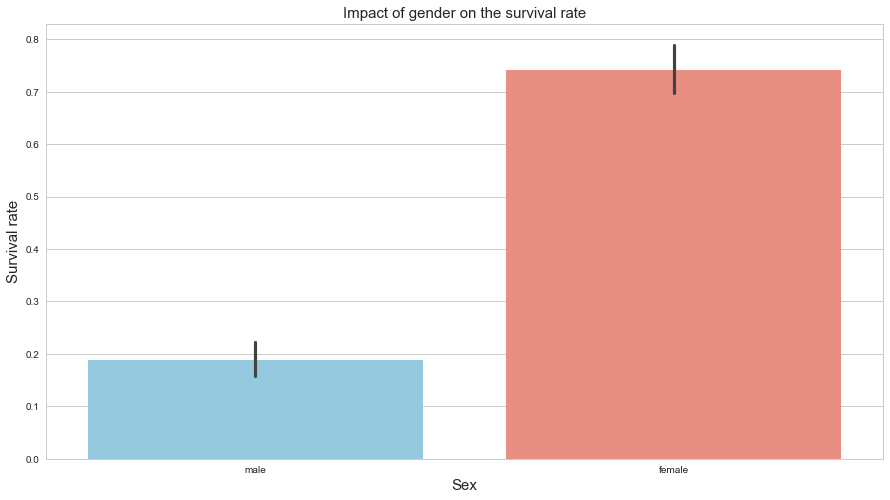

In [39]:
# Plot the box plot
pal = {'female':"salmon",'male':"skyblue"}
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", y = "Survived", data=train, palette = pal)
plt.title("Impact of gender on the survival rate",fontsize=15)
plt.ylabel("Survival rate",fontsize=15)
plt.xlabel("Sex",fontsize=15);

In [40]:
print("Male survival rate = \t %.2f" % (train[train.Sex =='male']['Survived'].mean()*100))
print("Female survival rate = \t %.2f" % (train[train.Sex != 'male']['Survived'].mean()*100))

Male survival rate = 	 18.89
Female survival rate = 	 74.20


**COMMENT**   
Based on the boxplot, the gender appears to be a critical feature when it comes to determining the faith of a passenger. Indeed, females seem to have on average a much higher survival rate.

### 4.2 Age

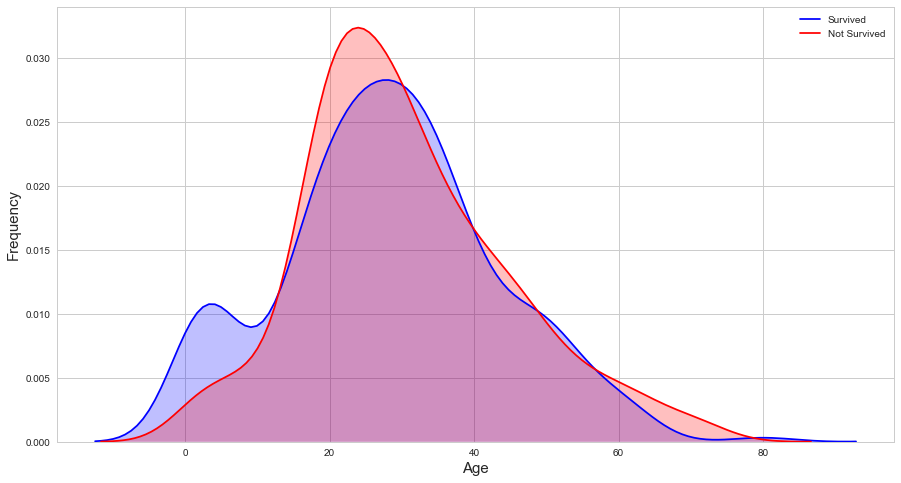

In [41]:
# Plot kernel density plot
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.kdeplot(train.loc[(train.Survived==1),'Age'],shade=True,color='blue',label='Survived');
ax = sns.kdeplot(train.loc[(train.Survived==0),'Age'],shade=True,color='red',label='Not Survived')
ax.set_ylabel('Frequency',fontsize=15)
ax.set_xlabel('Age',fontsize=15);

In [42]:
print("Children survival rate = \t %.2f" % round(train[train.Age <= 12]['Survived'].mean()*100,2))
print("Teenager survival rate = \t %.2f" % round(train[(train.Age > 12) & (train.Age <= 20)]['Survived'].mean()*100,2))
print("Adult survival rate = \t\t %.2f" % round(train[(train.Age > 20) & (train.Age <= 50)]['Survived'].mean()*100,2))
print("pre-senior survival rate = \t %.2f" % round(train[(train.Age > 50) & (train.Age <= 70)]['Survived'].mean()*100,2))
print("senior survival rate = \t\t %.2f" % round(train[train.Age > 70]['Survived'].mean()*100,2))

Children survival rate = 	 57.97
Teenager survival rate = 	 38.18
Adult survival rate = 		 39.49
pre-senior survival rate = 	 35.59
senior survival rate = 		 20.00


**COMMENT**   
Based on the distribution plot, the age also appears to be a critical feature. Young children have a much higher survival rate on average than the rest of the passenger. The survival rate tends to decrease with the age.

### 4.3 Pclass and Fare

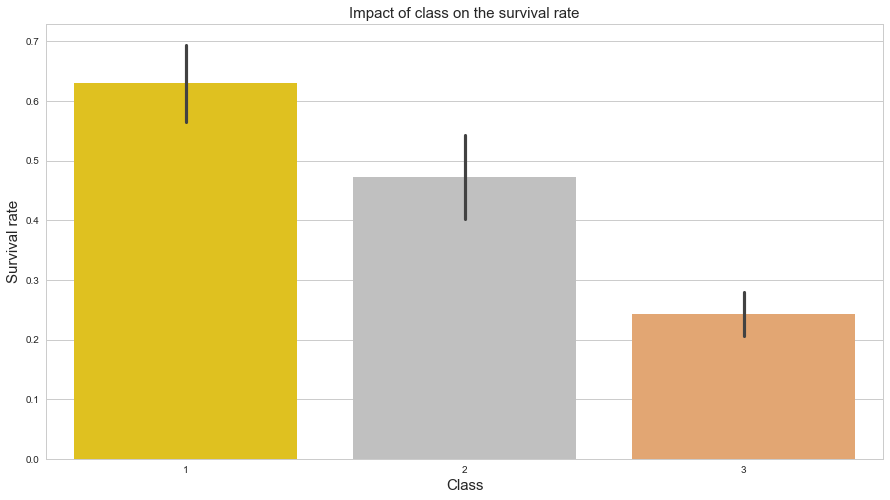

In [43]:
# Plot the survival rate per class
pal = {1:"gold",2:"silver",3:'sandybrown'}
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Pclass", y = "Survived", data=train, palette = pal)
plt.title("Impact of class on the survival rate",fontsize=15)
plt.ylabel("Survival rate",fontsize=15)
plt.xlabel("Class",fontsize=15);

In [44]:
print("Upper class survival rate = %f" % (train[train.Pclass == 1]['Survived'].mean()*100))
print("Middle class survival rate = %f" % (train[train.Pclass == 2]['Survived'].mean()*100))
print("Lower class survival rate = %f" % (train[train.Pclass == 3]['Survived'].mean()*100))

Upper class survival rate = 62.962963
Middle class survival rate = 47.282609
Lower class survival rate = 24.236253


**COMMENT**   
The above plot confirms our assumption: upper class passengers had a much higher survival rate.   
   
Before we look at the impact of the fare on the survival rate, we need to verify how the class is correlated to the fare.

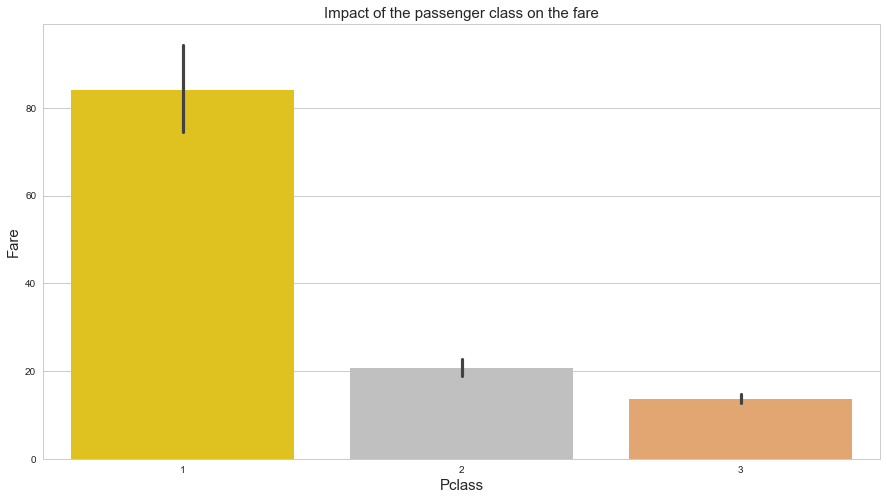

In [45]:
# Plot the survival rate per class
pal = {1:"gold",2:"silver",3:'sandybrown'}
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Pclass", y = "Fare", data=train, palette = pal)
plt.title("Impact of the passenger class on the fare",fontsize=15)
plt.ylabel("Fare",fontsize=15)
plt.xlabel("Pclass",fontsize=15);

In [46]:
print('Median fare:')
print("1st class = %f" % (train[train.Pclass == 1]['Fare'].median()))
print("2nd class = %f" % (train[train.Pclass == 2]['Fare'].median()))
print("3nd class = %f" % (train[train.Pclass == 3]['Fare'].median()))

Median fare:
1st class = 60.287500
2nd class = 14.250000
3nd class = 8.050000


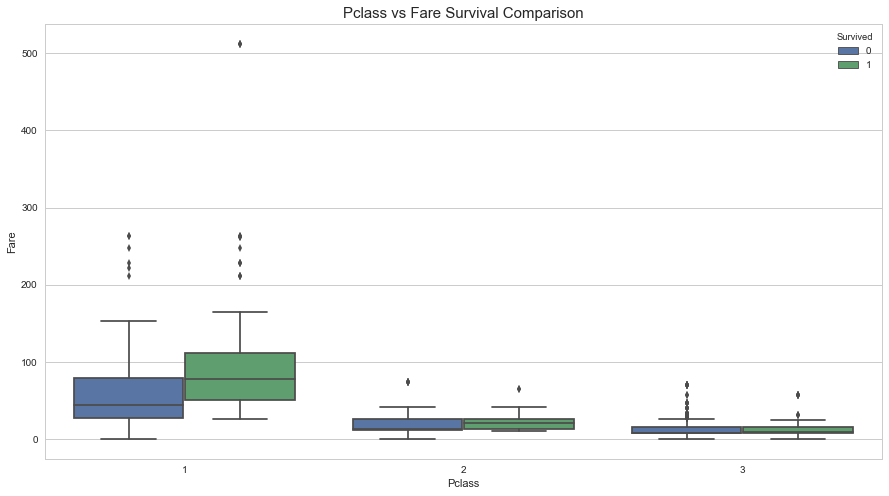

In [47]:
# Box plot
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, ax = ax)
ax.set_title('Pclass vs Fare Survival Comparison',fontsize=15);

In [48]:
train.Fare.max()

512.3292

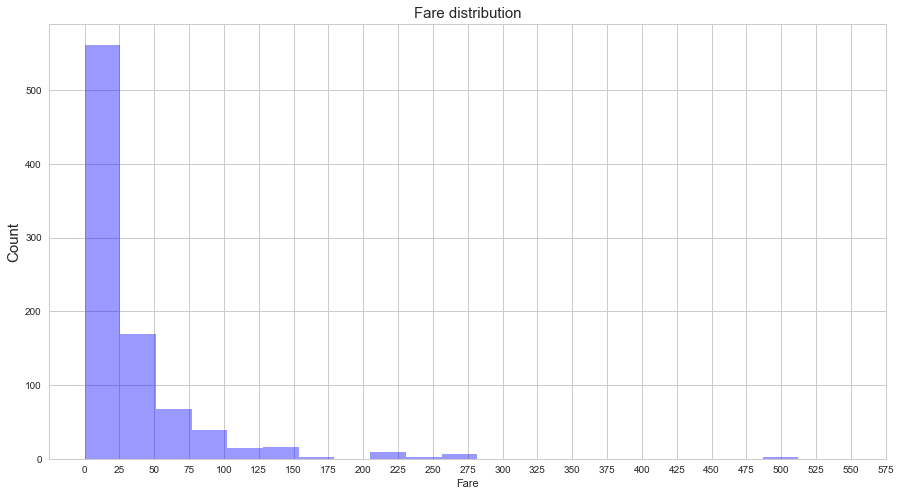

In [49]:
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(train['Fare'] , color='blue',kde=False,bins=20)
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Fare distribution',fontsize=15)
ax.set_xticks(range(0,600,25));

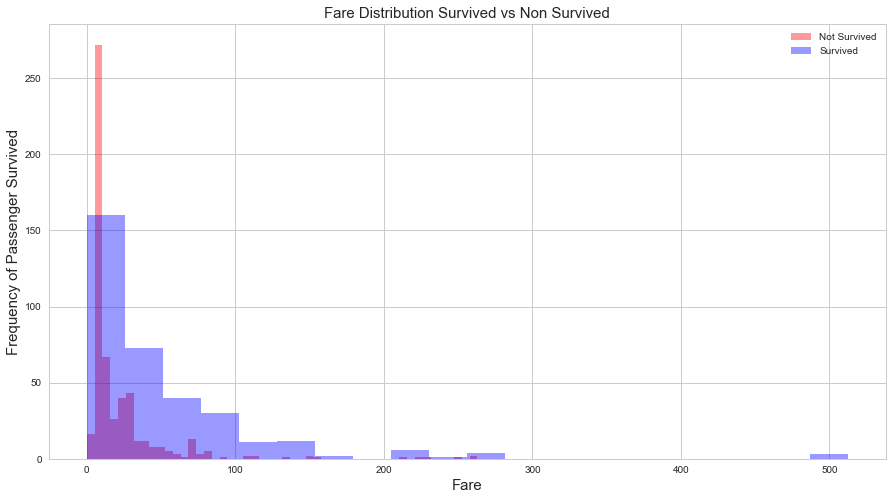

In [50]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(train.loc[(train['Survived'] == 0),'Fare'] , color='red',label='Not Survived',kde=False,bins=50)
ax=sns.distplot(train.loc[(train['Survived'] == 1),'Fare'] , color='blue', label='Survived',kde=False,bins=20)
ax.legend(['Not Survived','Survived'])
plt.xlabel("Fare",fontsize=15)
plt.ylabel("Frequency of Passenger Survived",fontsize=15)
plt.title('Fare Distribution Survived vs Non Survived',fontsize=15);

**COMMENT**   
As explected. the survival rate increases with the fare price. Based on the above plot, it appears that the survival rate is larger than 50% for fares higher that $150.

### 4.4 SibSp & Parch

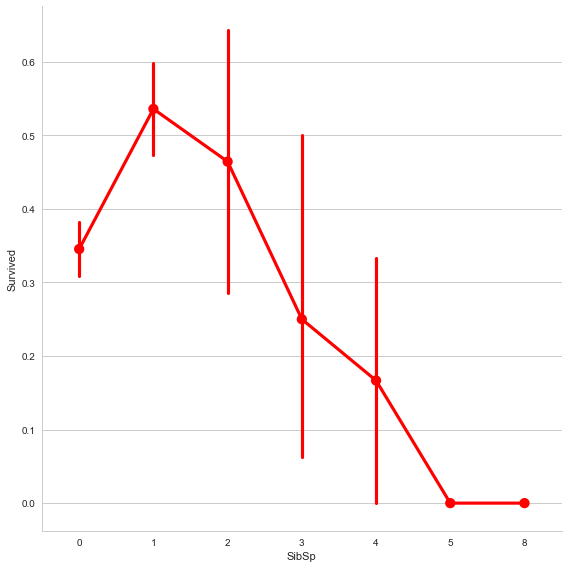

In [51]:
sns.factorplot(x="SibSp", y="Survived",color='r',data=train,size=8);

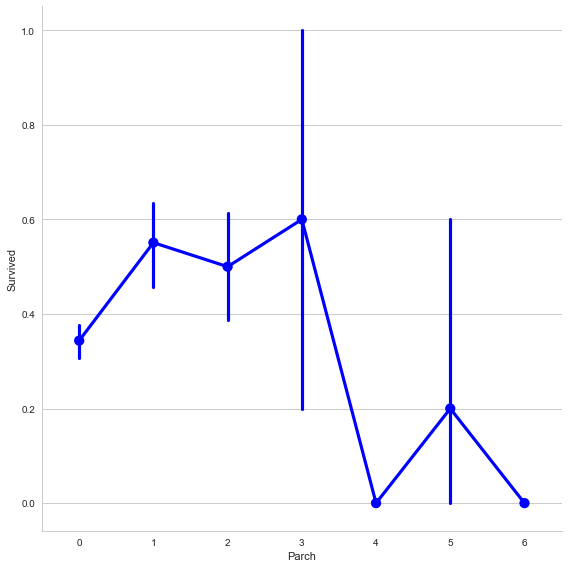

In [52]:
sns.factorplot(x="Parch", y="Survived",color='b', data=train,size=8);

**COMMENT**   
Passenger traveling with large family  had less survival rate than other passengers.

## 5. Statistical Study

In this section, we will inspect the data and quantify the observations that result from the data visualization.

In [53]:
# Turning the Sex feature into a boolean classifier
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

In [54]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


**COMMENT**   
From the statistical data above, it appears that only 38% of the passengers survived.

In [55]:
train[['Sex', 'Survived']].groupby("Sex").mean()

,Survived
Sex,
0,0.742038
1,0.188908


In [56]:
train[['Pclass', 'Survived']].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 5.1 Correlation Study

In [57]:
# Feature correlation
train.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

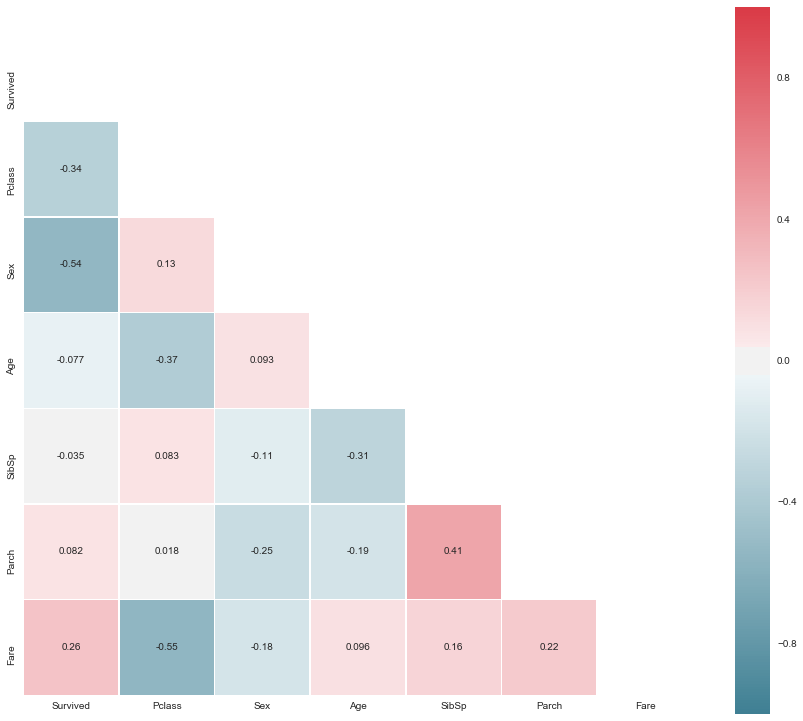

In [58]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,vmin=-1.0, center=0,annot=True,
            square=True, linewidths=.5)

**COMMENT**   
Strong positive correlations:
- Parch and SibSp (0.41)
- Fare and Survived (0.26)
- Parch and Fare (0.22)
   
Strong negative correlation
- Fare and Pclass (-0.55)
- Sex and Survived (-0.54)
- Pclass and Age (-0.37)
- Pclass and Survived (-0.34)

## 6. Feature Engineering
Based on the knowledge gathered, we can now create new features that will help improve the model accuracy.

### 6.1 family_count and family_group

For each passenger, we will sum the Parch and SibSp features to obtain the size of the family. We will also group the data into three different family sizes alone, small, large

In [59]:
train['family_count'] = train['SibSp'] + train['Parch'] + 1
test['family_count'] = test['SibSp'] + test['Parch'] + 1

In [60]:
def def_family_group(size):
    if size == 1:
        return 'alone'
    elif size <=4:
        return 'small'
    else:
        return 'large'

In [61]:
train['family_group'] = train['family_count'].map(def_family_group)
test['family_group'] = test['family_count'].map(def_family_group)

### 6.2 Fare

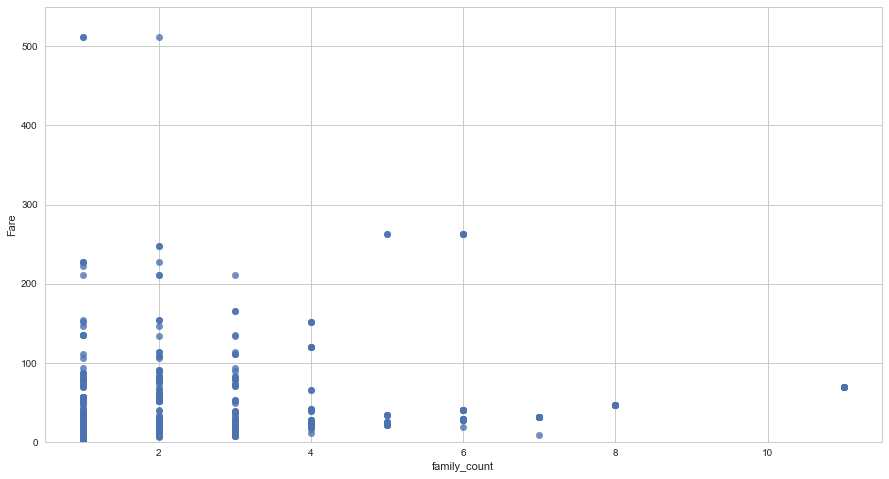

In [62]:
# Plot fare vs. family_count
fig = plt.figure(figsize=(15,8),)
sns.regplot(x='family_count',y='Fare',data=train,fit_reg=False)
plt.ylim([0,550]);

In [63]:
def def_fare_group(fare):
    if fare <= 25:
        return 'f_0_25'
    elif fare <= 50:
        return 'f_25_50'
    elif fare <= 75:
        return 'f_50_75'
    elif fare <= 100:
        return 'f_75_100'
    else:
        return "f_100_inf"

In [64]:
train['fare_group'] = train['Fare'].map(def_fare_group)
test['fare_group'] = test['Fare'].map(def_fare_group)

### 6.3 Name

#### 6.3.1 Name length

In [65]:
train['name_length'] = train['Name'].str.len()
test['name_length'] = test['Name'].str.len()

In [66]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,family_count,family_group,fare_group,name_length
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Z00,S,Z,2,small,f_0_25,23
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,2,small,f_50_75,51
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Z00,S,Z,1,alone,f_0_25,22
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,2,small,f_50_75,44
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Z00,S,Z,1,alone,f_0_25,24


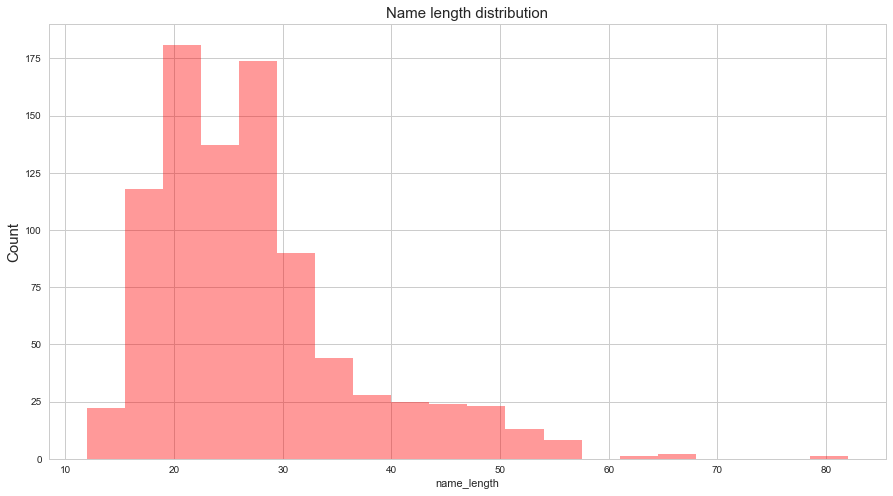

In [67]:
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(train['name_length'] , color='R',kde=False,bins=20)
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Name length distribution',fontsize=15);

In [68]:
def def_name_group(name_length):
    if name_length <= 20:
        return 'short'
    elif name_length <= 30:
        return 'medium'
    elif name_length <= 50:
        return 'long'
    else:
        return "extra_long"

In [69]:
train['name_group'] = train['name_length'].map(def_name_group)
test['name_group'] = test['name_length'].map(def_name_group)

#### 6.3.2 Passenger Title
Upon inspection of the Name feature, it appear that a title is assigned to each passenger. We extract this feature and store it in the dataset.

In [70]:
# Extrace new feature using regular expression
train['title'] = train['Name'].str.extract('\, ([a-zA-Z ]*).')
test['title'] = test['Name'].str.extract('\, ([a-zA-Z ]*).')

In [71]:
train.title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Ms                1
Sir               1
Jonkheer          1
Capt              1
Lady              1
Mme               1
the Countess      1
Name: title, dtype: int64

In [72]:
test.title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: title, dtype: int64

**COMMENT**   
Based on the results shown above, it appears that different title are used to describe the same status. For instance Miss, Mlle, and Ms are used to describe Miss. We standardize the titles using a custom function.

In [73]:
def strandardize_name(name):
    if name in ['Ms','Mlle']:
        return 'Miss'
    elif name=='Mme':
        return 'Mrs'
    elif name in ['Dr','Rev','Major','Col','Sir','Capt','the Countess','Jonkheer','Lady','Don','Dona']:
        return 'rare'
    else:
        return name   

In [74]:
train['title'] = train['title'].map(strandardize_name)
test['title'] = test['title'].map(strandardize_name)

In [75]:
train.title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
rare       23
Name: title, dtype: int64

In [76]:
test.title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
rare        6
Name: title, dtype: int64

### 6.4 Cabin

In [77]:
train["has_cabin"] = [0 if i == 'Z'else 1 for i in train.Deck]
test["has_cabin"] = [0 if i == 'Z'else 1 for i in test.Deck]

In [78]:
train.has_cabin.value_counts()

0    687
1    204
Name: has_cabin, dtype: int64

### 6.5 Create dummy features

In [79]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Deck','Embarked',
                                       'name_group', 'family_group',
                                       'fare_group'], drop_first=True)
test = pd.get_dummies(test, columns=['title',"Pclass",'Deck','Embarked',
                                     'name_group', 'family_group',
                                     'fare_group'], drop_first=True)

In [80]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'family_count', 'name_length', 'has_cabin', 'title_Miss',
       'title_Mr', 'title_Mrs', 'title_rare', 'Pclass_2', 'Pclass_3', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_Z',
       'Embarked_Q', 'Embarked_S', 'name_group_long', 'name_group_medium',
       'name_group_short', 'family_group_large', 'family_group_small',
       'fare_group_f_100_inf', 'fare_group_f_25_50', 'fare_group_f_50_75',
       'fare_group_f_75_100'],
      dtype='object')
Index(['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'family_count', 'name_length', 'has_cabin', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_rare', 'Pclass_2', 'Pclass_3', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z', 'Embarked_Q',
       'Embarked_S', 'name_group_long', 'name_group_medium',
       'name_group_short', 'family_group_large', 'family_

In [81]:
train.drop(['Deck_Z', 'family_count','Ticket','Name', 'Fare','name_length','Cabin'], axis=1, inplace=True)
test.drop(['Deck_Z', 'family_count','Ticket','Name', 'Fare','name_length','Cabin'], axis=1, inplace=True)

In [82]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'has_cabin', 'title_Miss',
       'title_Mr', 'title_Mrs', 'title_rare', 'Pclass_2', 'Pclass_3', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Embarked_Q', 'Embarked_S', 'name_group_long', 'name_group_medium',
       'name_group_short', 'family_group_large', 'family_group_small',
       'fare_group_f_100_inf', 'fare_group_f_25_50', 'fare_group_f_50_75',
       'fare_group_f_75_100'],
      dtype='object')
Index(['Sex', 'Age', 'SibSp', 'Parch', 'has_cabin', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_rare', 'Pclass_2', 'Pclass_3', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Embarked_Q', 'Embarked_S',
       'name_group_long', 'name_group_medium', 'name_group_short',
       'family_group_large', 'family_group_small', 'fare_group_f_100_inf',
       'fare_group_f_25_50', 'fare_group_f_50_75', 'fare_group_f_75_100'],
      dtype='object')


### 6.6 Age feature

Now that we have cleaned the data and generated new features, we can focus on the missing age values.

In [83]:
# Move the age feature as index
front = train['Age']
train.drop(labels=['Age'], axis=1,inplace = True)
train.insert(0, 'Age', front)
train.head()

,Age,Survived,Sex,SibSp,Parch,has_cabin,title_Miss,title_Mr,title_Mrs,title_rare,...,Embarked_S,name_group_long,name_group_medium,name_group_short,family_group_large,family_group_small,fare_group_f_100_inf,fare_group_f_25_50,fare_group_f_50_75,fare_group_f_75_100
0,22.0,0,1,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
1,38.0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,26.0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,35.0,1,0,1,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,35.0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


In [84]:
front = test['Age']
test.drop(labels=['Age'], axis=1,inplace = True)
test.insert(0, 'Age', front)
test.head()

,Age,Sex,SibSp,Parch,has_cabin,title_Miss,title_Mr,title_Mrs,title_rare,Pclass_2,...,Embarked_S,name_group_long,name_group_medium,name_group_short,family_group_large,family_group_small,fare_group_f_100_inf,fare_group_f_25_50,fare_group_f_50_75,fare_group_f_75_100
0,34.5,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,47.0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
2,62.0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,27.0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,22.0,0,1,1,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [85]:
# importing missing values using KNN for age column. 
from fancyimpute import KNN
age_train = KNN(k=10).complete(train)

Using TensorFlow backend.


Imputing row 1/891 with 0 missing, elapsed time: 0.273
Imputing row 101/891 with 0 missing, elapsed time: 0.275
Imputing row 201/891 with 0 missing, elapsed time: 0.276
Imputing row 301/891 with 1 missing, elapsed time: 0.277
Imputing row 401/891 with 0 missing, elapsed time: 0.278
Imputing row 501/891 with 0 missing, elapsed time: 0.280
Imputing row 601/891 with 0 missing, elapsed time: 0.283
Imputing row 701/891 with 0 missing, elapsed time: 0.286
Imputing row 801/891 with 0 missing, elapsed time: 0.287


In [86]:
# Recombine the data
train = pd.DataFrame(age_train, columns = train.columns)
train.head(2)

,Age,Survived,Sex,SibSp,Parch,has_cabin,title_Miss,title_Mr,title_Mrs,title_rare,...,Embarked_S,name_group_long,name_group_medium,name_group_short,family_group_large,family_group_small,fare_group_f_100_inf,fare_group_f_25_50,fare_group_f_50_75,fare_group_f_75_100
0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,38.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [87]:
age_test = KNN(k=10).complete(test)

test = pd.DataFrame(age_test, columns = test.columns)
test.head(2)

Imputing row 1/418 with 0 missing, elapsed time: 0.041
Imputing row 101/418 with 0 missing, elapsed time: 0.041
Imputing row 201/418 with 1 missing, elapsed time: 0.042
Imputing row 301/418 with 0 missing, elapsed time: 0.043
Imputing row 401/418 with 0 missing, elapsed time: 0.044


,Age,Sex,SibSp,Parch,has_cabin,title_Miss,title_Mr,title_Mrs,title_rare,Pclass_2,...,Embarked_S,name_group_long,name_group_medium,name_group_short,family_group_large,family_group_small,fare_group_f_100_inf,fare_group_f_25_50,fare_group_f_50_75,fare_group_f_75_100
0,34.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [88]:
def def_age_group(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'young_adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior'
    else:
        a = 'old'
    return a

In [89]:
train['age_group'] = train['Age'].map(def_age_group)
test['age_group'] = test['Age'].map(def_age_group)

In [90]:
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True)

## 7. Model Preparation

We will now prepare the data before creating a model. The preparation is divided into three steps:
1. Separate the dataframe into our input data and our output feature (X and y).
2. In order to evaluate our models, we will separate our input data into a training set and a test set.
3. Finally, we will normalize our input data.

In [91]:
# Step 1: define X and y
X = train.drop(['Survived'],axis=1)
y = train['Survived']

In [92]:
# Step 2: define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Step 3: scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# We also scale our final test set
test = scaler.fit_transform(test)

## 8. Models

In this section, we will make predictions using the following models:
1. Logistic Regression (Classification)
2. K-Nearest Neighbors
3. Support Vector Machines
4. Gaussian Naive Bayes
5. Decision Tree Classifier
6. Bagging
7. Random Forest Classifier
8. Gradient Boosting Classifier

In [94]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

### 8.1 Logistic Regression

In [95]:
# Create model
logreg = LogisticRegression()

# Fit model
logreg.fit(X_train,y_train)

# Make predictions on test set
y_pred = logreg.predict(X_test)

In [96]:
# Compute metrics

# Cross validation
acc = cross_val_score(logreg,X_train,y_train,cv=10)
print("Logistic Regression accuracy = %.2f" % acc.mean())

Logistic Regression accuracy = 0.82


We now perform the optimization of the hyper-parameters ("C" and the regularization method l1 or l2 for logistic regression)

In [97]:
# candidate parameters and cadidate values
C_vals = [0.1,0.2,0.5,0.8,1,5,10,15,20]
penalties = ['l1','l2']

# Set parameter dictionary
param_grid = {'penalty': penalties, 'C': C_vals}

# Generate grid search
gs = GridSearchCV(estimator=logreg,param_grid=param_grid,scoring='accuracy',cv=10)

# Fit the grid
gs_fit = gs.fit(X_train,y_train)

In [98]:
# Result Summary
print("Logistic Regression:\n")
print("Best parameters: "+str(gs_fit.best_params_))
print("Best score: "+ str(gs_fit.best_score_))

Logistic Regression:

Best parameters: {'C': 10, 'penalty': 'l1'}
Best score: 0.8230337078651685


In [99]:
# Test accuracy on test set
logreg_acc = gs_fit.best_estimator_.score(X_test,y_test)
print(logreg_acc)

0.7932960893854749


### 8.2 KNN

In [100]:
# Search for the best number of groups
scores = []
best_score = [0,0]

for k in range(1,100):
    # Create model
    knn = KNeighborsClassifier(n_neighbors=k,weights='uniform')

    # Fit model
    knn.fit(X_train,y_train)

    # Obtain score
    score = accuracy_score(y_test, knn.predict(X_test))
    scores.append(score)
        
    if score > best_score[1]:
        best_score = [k,score]

Text(0,0.5,'accuracy')

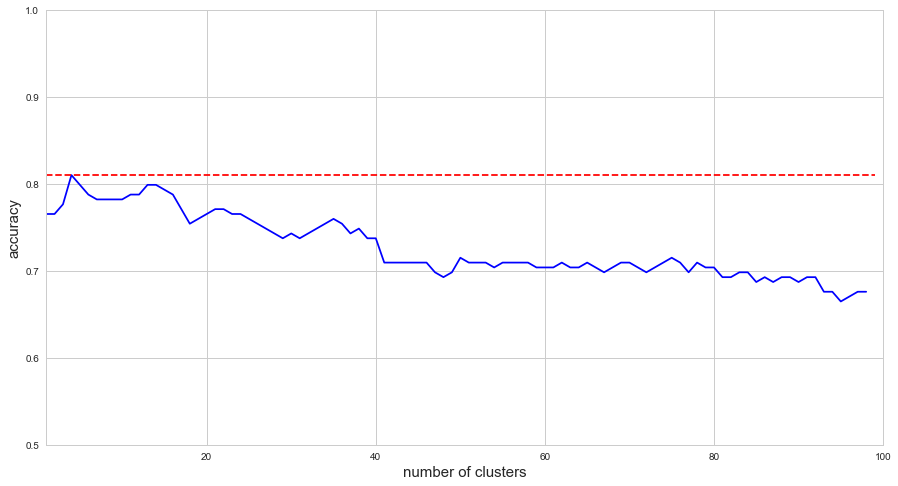

In [101]:
# Plot results
fig, ax = plt.subplots(figsize = (15,8))
ax = plt.plot(scores,c='b')
ax = plt.plot([1,99],[best_score[1],best_score[1]],'--',c='r')
plt.xlim([1,100])
plt.ylim([0.5,1])
plt.xlabel('number of clusters',fontsize=15)
plt.ylabel('accuracy',fontsize=15)

In [102]:
print(best_score)

[5, 0.8100558659217877]


In [103]:
# candidate parameters and cadidate values
n_neighbors = [2,3,4,5,6,7,8,9,10]
weights = ['uniform','distance']

# Set parameter dictionary
param_grid = {'n_neighbors': n_neighbors, 'weights': weights}

# Generate grid search
gs = GridSearchCV(estimator=knn,param_grid=param_grid,scoring='accuracy',
                  cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))

# Fit the grid
gs_fit = gs.fit(X_train,y_train)

In [104]:
# Result Summary
print("KNN:\n")
print("Best parameters: "+str(gs_fit.best_params_))
print("Best score: "+ str(gs_fit.best_score_))

KNN:

Best parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Best score: 0.8160112359550562


In [105]:
# Test accuracy on test set
knn_acc = gs_fit.best_estimator_.score(X_test,y_test)
print(knn_acc)

0.8100558659217877


### 8.3 SMC

In [106]:
# Create model
svc = SVC(kernel = 'rbf', probability=True, random_state = 1, C = 3)

# Fit model
svc.fit(X_train, y_train)

# Make prediction
y_pred = svc.predict(X_test)
svc_accy = accuracy_score(y_pred, y_test)

In [107]:
# Result Summary
print("SVC:\n")
print("Score: "+ str(svc_accy))

SVC:

Score: 0.8044692737430168


### 8.4 Gaussian Naive Bayes

In [108]:
# Create model
naive = GaussianNB()

# Fit model
naive.fit(X_train, y_train)

# Make prediction
y_pred = naive.predict(X_test)
naive_accy = accuracy_score(y_pred, y_test)

In [109]:
# Result Summary
print("Gaussian Naive Bayes:\n")
print("Score: "+ str(naive_accy))

Gaussian Naive Bayes:

Score: 0.5865921787709497


### 8.5 Decision Tree Classifier

In [110]:
# Create model
tree = DecisionTreeClassifier()

# Fit model
tree.fit(X_train, y_train)

# Make prediction
y_pred = tree.predict(X_test)
tree_accy = accuracy_score(y_pred, y_test)

In [111]:
# Result Summary
print("Decision Tree (no optimization):\n")
print("Score: "+ str(tree_accy))

Decision Tree (no optimization):

Score: 0.7597765363128491


In [112]:
# Hyper parameter tuning
max_depth = range(1,50)
criterion = ['gini', 'entropy']
max_feature = [20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,'auto','sqrt','log2']

# Set parameter dictionary
param_grid = {'max_depth':max_depth,'max_features':max_feature,'criterion': criterion}

# Generate grid search
gs = GridSearchCV(estimator=tree,param_grid=param_grid,scoring='accuracy',
                  cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),n_jobs = -1)

# Fit the grid
gs_fit = gs.fit(X_train,y_train)

In [113]:
# Result Summary
print("Decision Tre Class.:\n")
print("Best parameters: "+str(gs_fit.best_params_))
print("Best score: "+ str(gs_fit.best_score_))

Decision Tre Class.:

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 35}
Best score: 0.8356741573033708


In [114]:
# Test accuracy on test set
dectree_acc = gs_fit.best_estimator_.score(X_test,y_test)
print(dectree_acc)

0.8212290502793296


### 8.6 Bagging

In [115]:
# Create model
bag = BaggingClassifier()

# Fit model
bag.fit(X_train, y_train)

# Make prediction
y_pred = bag.predict(X_test)
bag_accy = accuracy_score(y_pred, y_test)

In [116]:
# Result Summary
print("Bagging Classifier:\n")
print("Score: "+ str(bag_accy))

Bagging Classifier:

Score: 0.7877094972067039


### 8.7 Random Forest Classifier

In [117]:
# Create model
rd_tree = RandomForestClassifier(n_estimators=200, max_depth=10,min_samples_split=5,min_samples_leaf=5)

# Fit model
rd_tree.fit(X_train, y_train)

# Make prediction
y_pred = rd_tree.predict(X_test)
rd_tree_accy = accuracy_score(y_pred, y_test)

In [118]:
# Result Summary
print("Random Forest Tree Classifier (no optimization):\n")
print("Score: "+ str(rd_tree_accy))

Random Forest Tree Classifier (no optimization):

Score: 0.8324022346368715


In [119]:
# Hyper parameter tuning
n_estimators = range(10,150,10)
max_depth = range(1,25)

# Set parameter dictionary
param_grid = {'n_estimators':n_estimators,'max_depth':max_depth}

# Generate grid search
gs = GridSearchCV(estimator=rd_tree,param_grid=param_grid,
                  cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),n_jobs = -1)

# Fit the grid
gs_fit = gs.fit(X_train,y_train)

In [120]:
# Result Summary
print("Random Forest Classifier.:\n")
print("Best parameters: "+str(gs_fit.best_params_))
print("Best score: "+ str(gs_fit.best_score_))

Random Forest Classifier.:

Best parameters: {'max_depth': 16, 'n_estimators': 40}
Best score: 0.8384831460674157


### 8.8 Gradient Boosting Classifier

In [121]:
# Create model
boost = GradientBoostingClassifier()

# Fit model
boost.fit(X_train, y_train)

# Make prediction
y_pred = boost.predict(X_test)
boost_accy = accuracy_score(y_pred, y_test)

In [122]:
# Result Summary
print("Gradient Boosting Classifier :\n")
print("Score: "+ str(boost_accy))

Gradient Boosting Classifier :

Score: 0.8491620111731844


## 9. Conclusion

In [123]:
models = ['Logistic Regression','KNN','SVC','Gaussian Naive Bayes','Decision Tree',
          'Bagging Classifier','Random Forest Tree','Gradient Boosting']
results = [logreg_acc,knn_acc,svc_accy,naive_accy,dectree_acc,bag_accy
           ,rd_tree_accy,boost_accy]

results = pd.DataFrame({'Score':results,'Models':models})

In [124]:
results.sort_values(['Score'],ascending=False)

,Models,Score
7,Gradient Boosting,0.849162
6,Random Forest Tree,0.832402
4,Decision Tree,0.821229
1,KNN,0.810056
2,SVC,0.804469
0,Logistic Regression,0.793296
5,Bagging Classifier,0.787709
3,Gaussian Naive Bayes,0.586592


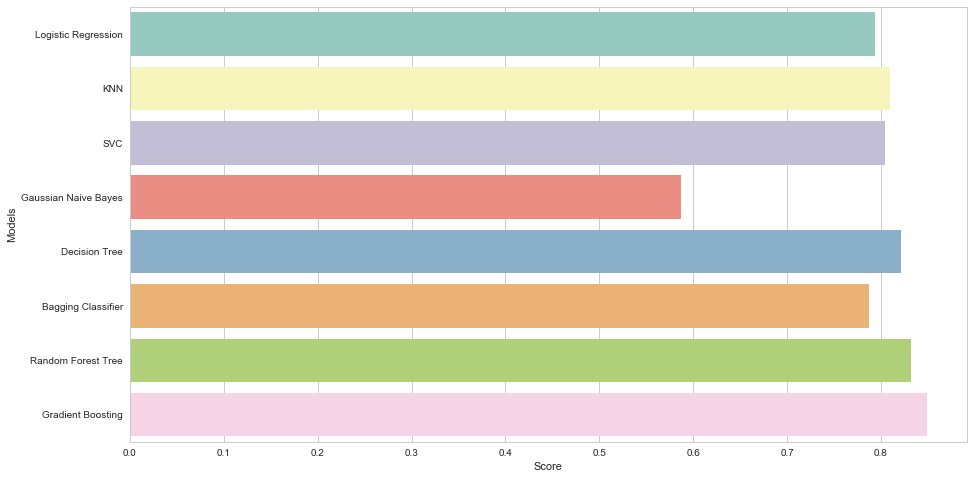

In [125]:
plt.subplots(figsize = (15,8))
g = sns.barplot('Score','Models',data = results,palette='Set3',orient = "h")